In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import datetime as dt
import os

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [3]:
FILE_PATH = os.path.abspath(os.curdir+"\\..\\data-processing\\data\\funds.pkl")
funds_df = pd.read_pickle(FILE_PATH)

In [4]:
funds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Ticker                         213 non-null    object        
 1   Nome                           213 non-null    object        
 2   Administrador                  213 non-null    object        
 3   Descrição                      190 non-null    object        
 4   Data de Constituição do Fundo  87 non-null     datetime64[ns]
 5   Cotas Emitidas                 212 non-null    float64       
 6   Tipo de Gestão                 204 non-null    object        
 7   Público Alvo                   209 non-null    object        
 8   Mandato                        204 non-null    object        
 9   Segmento                       204 non-null    object        
 10  Prazo de Duração               213 non-null    object        
 11  Taxa de Administraç

In [5]:
funds_df.head(n=3)

,Ticker,Nome,Administrador,Descrição,Data de Constituição do Fundo,Cotas Emitidas,Tipo de Gestão,Público Alvo,Mandato,Segmento,...,Taxa de Administração,Taxa de Performance,Ativos Atuais,Liquidez Diária,Patrimônio Líquido,Cotações Históricas,Dividendos Históricos,Dividend Yield Histórico,Valor Patrimonial Histórico,Vacância Histórica
0,ABCP11,FDO INV IMOB GRAND PLAZA SHOPPING,Rio Bravo,DESCRIÇÃO\nABCP11 – Um FII De Shopping\nABCP11...,NaT,1000000.0,Passiva,Investidores em Geral,Renda,Shoppings,...,"R$ 42.402 ao mês, atualizado anualmente pelo I...",None,{'Assets': {'GRAND PLAZA SHOPPING': {'Endereço...,3152.0,1.000000e+09,"[[2007-01-08 00:00:00, 2007-03-20 00:00:00, 20...","[[2004-03-01 00:00:00, 2004-04-01 00:00:00, 20...","[[2016-01-01 00:00:00, 2016-02-01 00:00:00, 20...","[[2016-01-01 00:00:00, 2016-02-01 00:00:00, 20...","{'date': [2019-04-01 00:00:00, 2019-05-01 00:0..."
1,AFOF11,ALIANZA FOFII FDO. INVEST. IMOB.,BRL Trust Investimentos,NaN,NaT,1000000.0,Ativa,Investidores em Geral,Títulos e Valores Mobiliários,Títulos e Val. Mob.,...,"0,80% a.a. sobre o Patrimônio Líquido",20% do que exceder a variação do IFIX,None,NaN,3.700000e+07,None,None,None,"[[2020-03-01 00:00:00, 2020-04-01 00:00:00], [...",None
2,ALMI11,FDO INV IMOB - FII TORRE ALMIRANTE,BTG Pactual,DESCRIÇÃO\nALMI11 – Um FII De Tijolo Mono Ativ...,2004-11-12,104700.0,Passiva,Investidores em Geral,Renda,Lajes Corporativas,...,0.383% a.a. sobre o Patrimônio do Fundo,None,{'Assets': {'EDIFÍCIO TORRE ALMIRANTE': {'Ende...,186.0,2.200000e+08,"[[2007-01-02 00:00:00, 2007-01-03 00:00:00, 20...","[[2005-07-01 00:00:00, 2005-08-01 00:00:00, 20...","[[2016-01-01 00:00:00, 2016-02-01 00:00:00, 20...","[[2015-06-01 00:00:00, 2015-07-01 00:00:00, 20...","{'date': [2019-04-01 00:00:00, 2019-05-01 00:0..."


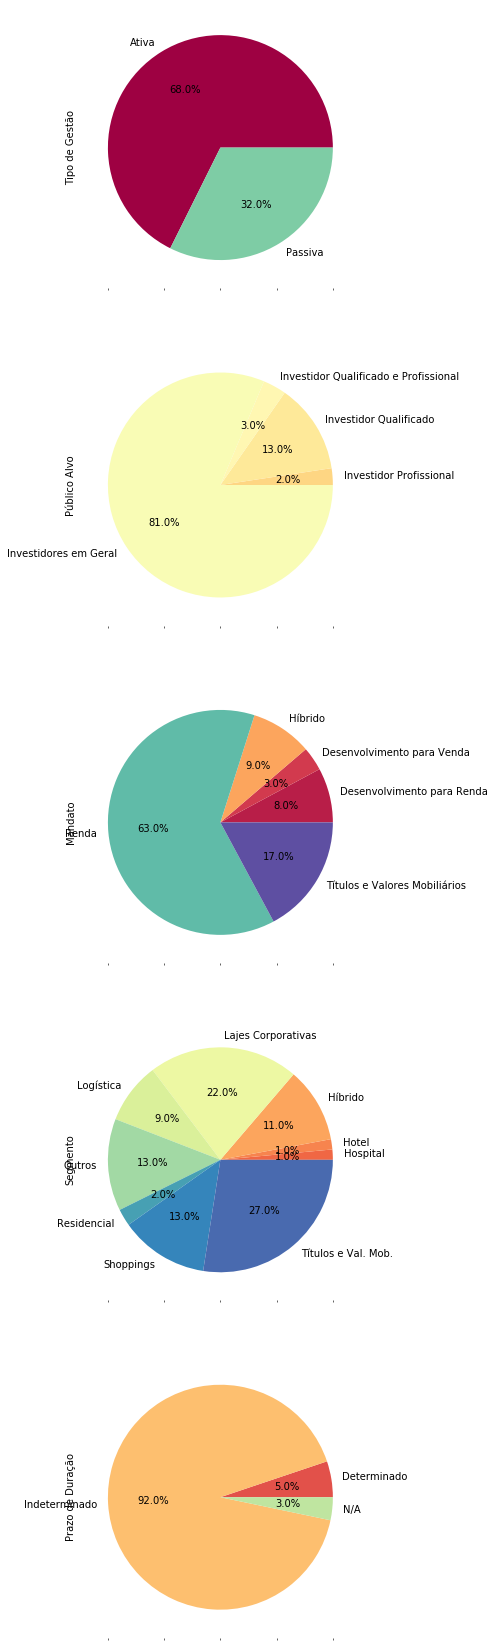

In [42]:
funds_df[['Tipo de Gestão', 'Público Alvo', 'Mandato', 'Segmento', 'Prazo de Duração']]\
    .apply(pd.value_counts).plot(kind='pie', subplots=True, layout=(5,1),
                                 figsize=(30,30), colormap='Spectral', legend=False,
                                 autopct=lambda p: '{:.1f}%'.format(round(p)) if p > 0 else '');

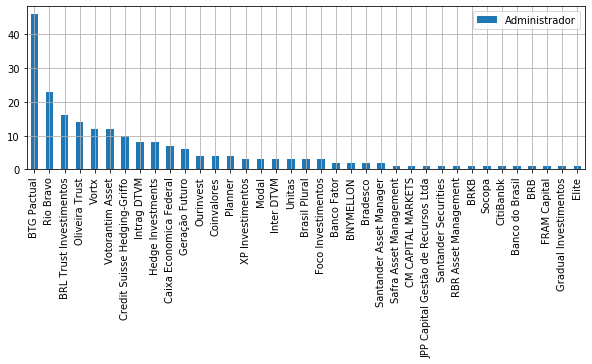

In [40]:
funds_df[['Administrador']].apply(pd.value_counts).plot(kind='bar', figsize=(10,3), grid=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C539814708>],
      dtype=object)

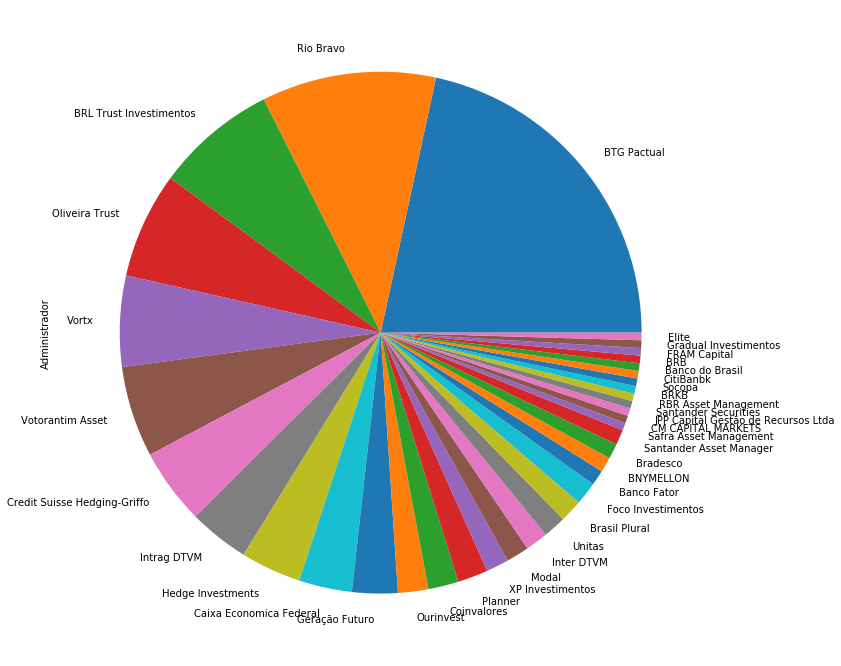

In [39]:
funds_df[['Administrador']].apply(pd.value_counts).plot(subplots=True, kind='pie',
                                                        figsize=(12,12), grid=True, legend=False)

In [149]:
# tipos de gestão
funds_df['Tipo de Gestão'].value_counts()

Ativa      138
Passiva     66
Name: Tipo de Gestão, dtype: int64

In [150]:
# público alvo
funds_df['Público Alvo'].value_counts()

Investidores em Geral                    170
Investidor Qualificado                    27
Investidor Qualificado e Profissional      7
Investidor Profissional                    5
Name: Público Alvo, dtype: int64

In [151]:
# mandato
funds_df["Mandato"].value_counts()

Renda                            128
Títulos e Valores Mobiliários     35
Híbrido                           18
Desenvolvimento para Renda        16
Desenvolvimento para Venda         7
Name: Mandato, dtype: int64

In [152]:
# segmento
funds_df["Segmento"].value_counts()

Títulos e Val. Mob.    56
Lajes Corporativas     44
Outros                 27
Shoppings              26
Híbrido                22
Logística              18
Residencial             5
Hotel                   3
Hospital                3
Name: Segmento, dtype: int64

In [153]:
# admnistrador
funds_df["Administrador"].value_counts()

BTG Pactual                            46
Rio Bravo                              23
BRL Trust Investimentos                16
Oliveira Trust                         14
Vortx                                  12
Votorantim Asset                       12
Credit Suisse Hedging-Griffo           10
Hedge Investments                       8
Intrag DTVM                             8
Caixa Economica Federal                 7
Geração Futuro                          6
Planner                                 4
Ourinvest                               4
Coinvalores                             4
Foco Investimentos                      3
Brasil Plural                           3
Inter DTVM                              3
XP Investimentos                        3
Modal                                   3
Unitas                                  3
BNYMELLON                               2
Bradesco                                2
Banco Fator                             2
Santander Asset Manager           

In [154]:
funds_df.dropna(subset=["Cotas Emitidas", "Tipo de Gestão",
                        "Público Alvo", "Mandato", "Segmento",
                        "Patrimônio Líquido", "Descrição"]).reset_index(drop=True).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Ticker                         185 non-null    object        
 1   Nome                           185 non-null    object        
 2   Administrador                  185 non-null    object        
 3   Descrição                      185 non-null    object        
 4   Data de Constituição do Fundo  76 non-null     datetime64[ns]
 5   Cotas Emitidas                 185 non-null    float64       
 6   Tipo de Gestão                 185 non-null    object        
 7   Público Alvo                   185 non-null    object        
 8   Mandato                        185 non-null    object        
 9   Segmento                       185 non-null    object        
 10  Prazo de Duração               185 non-null    object        
 11  Taxa de Administraç

In [155]:
funds_df.head(2)

,Ticker,Nome,Administrador,Descrição,Data de Constituição do Fundo,Cotas Emitidas,Tipo de Gestão,Público Alvo,Mandato,Segmento,...,Taxa de Administração,Taxa de Performance,Ativos Atuais,Liquidez Diária,Patrimônio Líquido,Cotações Históricas,Dividendos Históricos,Dividend Yield Histórico,Valor Patrimonial Histórico,Vacância Histórica
0,ABCP11,FDO INV IMOB GRAND PLAZA SHOPPING,Rio Bravo,DESCRIÇÃO\nABCP11 – Um FII De Shopping\nABCP11...,NaT,1000000.0,Passiva,Investidores em Geral,Renda,Shoppings,...,"R$ 42.402 ao mês, atualizado anualmente pelo I...",None,{'Assets': {'GRAND PLAZA SHOPPING': {'Endereço...,3152.0,1.000000e+09,"[[2007-01-08 00:00:00, 2007-03-20 00:00:00, 20...","[[2004-03-01 00:00:00, 2004-04-01 00:00:00, 20...","[[2016-01-01 00:00:00, 2016-02-01 00:00:00, 20...","[[2016-01-01 00:00:00, 2016-02-01 00:00:00, 20...","{'date': [2019-04-01 00:00:00, 2019-05-01 00:0..."
1,AFOF11,ALIANZA FOFII FDO. INVEST. IMOB.,BRL Trust Investimentos,NaN,NaT,1000000.0,Ativa,Investidores em Geral,Títulos e Valores Mobiliários,Títulos e Val. Mob.,...,"0,80% a.a. sobre o Patrimônio Líquido",20% do que exceder a variação do IFIX,None,NaN,3.700000e+07,None,None,None,"[[2020-03-01 00:00:00, 2020-04-01 00:00:00], [...",None


In [161]:
import string
from pprint import pprint
from sklearn.base import BaseEstimator, TransformerMixin

# drop rows
class DropRows(BaseEstimator, TransformerMixin):
    def fit(self, x, y=None):
        return self
    
    def transform(self, X):
        return X.dropna(subset=["Cotas Emitidas", "Tipo de Gestão",
                        "Público Alvo", "Mandato", "Segmento",
                        "Patrimônio Líquido", "Descrição"]).reset_index(drop=True)

# remove title
class CleanHeaders(BaseEstimator, TransformerMixin):
    def __init__(self, col):
        self.col_index = col
    
    def fit(self, x, y=None):
        return self
    
    def transform(self, X):
        all_rows = X.iloc[:,self.col_index]
        changed_column = [None]*len(all_rows)
        
        for row, series in enumerate(all_rows):  
            if not series == None and str(series) != 'nan':
                pos = series.find("DESCRIÇÃO")
                if pos == 0:
                    changed_column[row] = series[9:]
                else: 
                    changed_column[row] = series
                    
        X.iloc[:,self.col_index] = changed_column
        return X

# remove punctuation   
class CleanPunct(BaseEstimator, TransformerMixin):    
    def __init__(self, col):
        self.table_punct = str.maketrans({key: " " for key in string.punctuation.replace("$","").replace("%", "") + ' \t\n\r\f\v–'})
        self.col_index = col
        
    def fit(self, x, y=None):
        return self

    def transform(self, X):
        all_rows = X.iloc[:,self.col_index]
        changed_column = [None]*len(all_rows)
        
        for row, series in enumerate(all_rows):                
            if not series == None and str(series) != 'nan':
                clean_doc = ' '.join(series.lower().translate(self.table_punct).split())
                changed_column[row] = clean_doc
                
        X.iloc[:,self.col_index] = changed_column
        return X
    
clean_headers = CleanHeaders(col=3).fit_transform(funds_df)
clean_punct = CleanPunct(col=3).fit_transform(clean_headers)

In [166]:
clean_punct

,Ticker,Nome,Administrador,Descrição,Data de Constituição do Fundo,Cotas Emitidas,Tipo de Gestão,Público Alvo,Mandato,Segmento,...,Taxa de Administração,Taxa de Performance,Ativos Atuais,Liquidez Diária,Patrimônio Líquido,Cotações Históricas,Dividendos Históricos,Dividend Yield Histórico,Valor Patrimonial Histórico,Vacância Histórica
0,ABCP11,FDO INV IMOB GRAND PLAZA SHOPPING,Rio Bravo,abcp11 um fii de shopping abcp11 é um fundo im...,NaT,1000000.0,Passiva,Investidores em Geral,Renda,Shoppings,...,"R$ 42.402 ao mês, atualizado anualmente pelo I...",None,{'Assets': {'GRAND PLAZA SHOPPING': {'Endereço...,3152.0,1.000000e+09,"[[2007-01-08 00:00:00, 2007-03-20 00:00:00, 20...","[[2004-03-01 00:00:00, 2004-04-01 00:00:00, 20...","[[2016-01-01 00:00:00, 2016-02-01 00:00:00, 20...","[[2016-01-01 00:00:00, 2016-02-01 00:00:00, 20...","{'date': [2019-04-01 00:00:00, 2019-05-01 00:0..."
1,AFOF11,ALIANZA FOFII FDO. INVEST. IMOB.,BRL Trust Investimentos,None,NaT,1000000.0,Ativa,Investidores em Geral,Títulos e Valores Mobiliários,Títulos e Val. Mob.,...,"0,80% a.a. sobre o Patrimônio Líquido",20% do que exceder a variação do IFIX,None,NaN,3.700000e+07,None,None,None,"[[2020-03-01 00:00:00, 2020-04-01 00:00:00], [...",None
2,ALMI11,FDO INV IMOB - FII TORRE ALMIRANTE,BTG Pactual,almi11 um fii de tijolo mono ativo almi11 é um...,2004-11-12,104700.0,Passiva,Investidores em Geral,Renda,Lajes Corporativas,...,0.383% a.a. sobre o Patrimônio do Fundo,None,{'Assets': {'EDIFÍCIO TORRE ALMIRANTE': {'Ende...,186.0,2.200000e+08,"[[2007-01-02 00:00:00, 2007-01-03 00:00:00, 20...","[[2005-07-01 00:00:00, 2005-08-01 00:00:00, 20...","[[2016-01-01 00:00:00, 2016-02-01 00:00:00, 20...","[[2015-06-01 00:00:00, 2015-07-01 00:00:00, 20...","{'date': [2019-04-01 00:00:00, 2019-05-01 00:0..."
3,ALZR11,ALIANZA TRUST RENDA IMOBILIARIA FDO INV IMOB,BTG Pactual,alzr11 um fundo focado em contratos de locação...,NaT,997042.0,Ativa,Investidores em Geral,Renda,Logística,...,"0,20% a.a. aobre PL, com mínimo mensal de R$ 2...",None,{'Assets': {'AIR LIQUIDE': {'Endereço': ' Av. ...,11570.0,2.700000e+08,"[[2018-01-04 00:00:00, 2018-01-05 00:00:00, 20...","[[2017-12-01 00:00:00, 2018-01-01 00:00:00, 20...","[[2017-12-01 00:00:00, 2018-01-01 00:00:00, 20...","[[2017-12-01 00:00:00, 2018-01-01 00:00:00, 20...","{'date': [2019-05-01 00:00:00, 2019-06-01 00:0..."
4,ANCR11B,FDO INV IMOB - FII ANCAR IC,Geração Futuro,ancr11b um fundo especialista em shoppings anc...,2006-01-03,276117.0,None,None,None,None,...,None,None,None,1.0,NaN,"[[2009-05-07 00:00:00, 2009-06-08 00:00:00, 20...",None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,XPML11,XP MALLS FDO INV IMOB FII,BTG Pactual,xpml11 um fii de shopping center xpml11 é um f...,NaT,3750000.0,Ativa,Investidores em Geral,Renda,Shoppings,...,"0,55% a.a., sendo 0,75 % a.a., escalonado conf...","20,0% da rentabilidade que exceder o Benchmark...",{'Assets': {'CATARINA FASHION OUTLET': {'Ender...,43304.0,2.000000e+09,"[[2017-12-28 00:00:00, 2018-01-02 00:00:00, 20...","[[2017-12-01 00:00:00, 2018-01-01 00:00:00, 20...","[[2017-12-01 00:00:00, 2018-01-01 00:00:00, 20...","[[2017-12-01 00:00:00, 2018-01-01 00:00:00, 20...","{'date': [2019-04-01 00:00:00, 2019-05-01 00:0..."
209,XPPR11,XP PROPERTIES FDO. INV. IMOB.,Vortx,xppr11 fii de tijolo que investe nas áreas de ...,NaT,4320000.0,Ativa,Investidores em Geral,Renda,Outros,...,"0,95%-0,75% a.a., conforme Regulamento.","20% do que exceder IPCA + 6,0% a.a",{'Assets': {'BOX 298 - ISOBAR': {'Endereço': '...,15142.0,4.100000e+08,"[[2019-12-09 00:00:00, 2019-12-10 00:00:00, 20...","[[2019-12-01 00:00:00, 2020-01-01 00:00:00, 20...","[[2019-12-01 00:00:00, 2020-01-01 00:00:00, 20...","[[2019-11-01 00:00:00, 2019-12-01 00:00:00, 20...","{'date': [2019-12-01 00:00:00, 2020-01-01 00:0..."
210,XPSF11,XP SELECTION FDO DE FUNDOS INV IMOB - FII,XP Investimentos,None,2018-07-22,3350000.0,Ativa,Investidores em Geral,Renda,Outros,...,1% a.a. sobre 

In [13]:
funds_df = DropRows().fit_transform(funds_df)
funds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Ticker                         185 non-null    object        
 1   Nome                           185 non-null    object        
 2   Administrador                  185 non-null    object        
 3   Descrição                      185 non-null    object        
 4   Data de Constituição do Fundo  76 non-null     datetime64[ns]
 5   Cotas Emitidas                 185 non-null    float64       
 6   Tipo de Gestão                 185 non-null    object        
 7   Público Alvo                   185 non-null    object        
 8   Mandato                        185 non-null    object        
 9   Segmento                       185 non-null    object        
 10  Prazo de Duração               185 non-null    object        
 11  Taxa de Administraç

In [14]:
# testando a classe para outras colunas com texto
text_columns = ["Taxa de Administração", "Taxa de Performance"]
for col in text_columns:
    original = funds_df[col][4]
    clean_headers = CleanHeaders().fit_transform(original)
    clean_punct = CleanPunct().fit_transform(clean_headers)
    
    pprint(clean_punct)

['0 14% sobre o patrimônio líquido']
['20% sobre o que exceder 100% do cdi']


In [15]:
funds_df.iloc[:,17]

0      [[2004-03-01 00:00:00, 2004-04-01 00:00:00, 20...
1      [[2005-07-01 00:00:00, 2005-08-01 00:00:00, 20...
2      [[2017-12-01 00:00:00, 2018-01-01 00:00:00, 20...
3      [[2016-01-01 00:00:00, 2016-02-01 00:00:00, 20...
4      [[2019-12-01 00:00:00, 2020-01-01 00:00:00, 20...
                             ...                        
180    [[2018-07-01 00:00:00, 2018-08-01 00:00:00, 20...
181    [[2018-06-01 00:00:00, 2018-07-01 00:00:00, 20...
182    [[2017-12-01 00:00:00, 2018-01-01 00:00:00, 20...
183    [[2019-12-01 00:00:00, 2020-01-01 00:00:00, 20...
184    [[2012-12-01 00:00:00, 2013-01-01 00:00:00, 20...
Name: Dividendos Históricos, Length: 185, dtype: object

In [16]:
class ProcessDividends(BaseEstimator, TransformerMixin):
    # column index
    col_index = 17
        
    def fit(self, X, y=None):
        return self  # nothing else to do

    def transform(self, X, y=None):
        all_rows = X.iloc[:,ProcessDividends.col_index]
        
        new_columns = [[0]*len(all_rows) for _ in range(19)] # M1 -> M12 + ult. tri + mean + min + max + var + skew + kurt
        
        for row, series in enumerate(all_rows):                
            if not series == None:
                # ordenando por data
                dates, dividends = zip(*sorted(zip(series[0], series[1]), reverse=True))
                mean_dividends = np.mean(dividends)

                for index, date in enumerate(dates):              
                    month_n = ((dates[0]-date).days)//30

                    if month_n > 11: 
                        break
                        
                    else:
                        new_columns[month_n][row] = dividends[index]
                        
                                              
                new_columns[12][row] = sum([
                    float(new_columns[0][row] or 0), float(new_columns[1][row] or 0), float(new_columns[2][row] or 0)
                ])
                        
                indicators = sp.stats.describe(np.array(dividends))
                new_columns[13][row] = indicators.mean
                new_columns[14][row] = indicators.minmax[0]
                new_columns[15][row] = indicators.minmax[1]
                new_columns[16][row] = np.sqrt(indicators.variance)/mean_dividends
                new_columns[17][row] = indicators.skewness
                new_columns[18][row] = indicators.kurtosis
              
        return_list = X
        for new_column in new_columns:
            return_list = np.c_[return_list, new_column]
        
        return np.c_[return_list]

In [17]:
class ProcessPrices(BaseEstimator, TransformerMixin):
    # column index
    col_index = 16
    
    def _filter_date(self, d_to_compare, d, month_n):
        date_ref = d.replace(
            year=d.year if d.month > month_n else d.year - 1,
            month=d.month-month_n if d.month > month_n else 12-(month_n-1),
            day=1
        )
        
        return d_to_compare.month == date_ref.month and d_to_compare.year == date_ref.year
        
    def fit(self, X, y=None):
        return self  # nothing else to do

    def transform(self, X, y=None):
        all_rows = X.iloc[:,ProcessPrices.col_index]
        
        new_columns = [[0]*len(all_rows) for _ in range(19)] # (mean) M1 -> M12 + mean + 
                                                             #        min + max + var + skew + kurt + max_var_pct
        
        for row, series in enumerate(all_rows):
            if not series == None:
                # ordenando por data
                dates, prices = zip(*sorted(zip(series[0], series[1]), reverse=True))
                mean_price = np.mean(prices)

                for month_n in range(12):
                    indexes = [dates.index(date) for date in dates if self._filter_date(date, dates[0], month_n)]  
                    
                    if len(indexes) == 0:
                        month_prices = [0]
                    else:
                        month_prices = prices[min(indexes): max(indexes)+1]
                    
                    new_columns[month_n][row] = np.mean(month_prices)
                    
                indicators = sp.stats.describe(prices)
                new_columns[12][row] = indicators.mean
                new_columns[13][row] = indicators.minmax[0]
                new_columns[14][row] = indicators.minmax[1]
                new_columns[15][row] = np.sqrt(indicators.variance)/mean_price
                new_columns[16][row] = indicators.skewness
                new_columns[17][row] = indicators.kurtosis
                new_columns[18][row] = (prices[0]/prices[-1])
              
        return_list = X
        for new_column in new_columns:
            return_list = np.c_[return_list, new_column]
        
        return np.c_[return_list]

In [18]:
class ProcessEquity(BaseEstimator, TransformerMixin):
    # column index
    col_index = 19
        
    def fit(self, X, y=None):
        return self  # nothing else to do

    def transform(self, X, y=None):
        all_rows = X.iloc[:,ProcessEquity.col_index]
        
        new_columns = [[0]*len(all_rows) for _ in range(19)] # M1 -> M12 + mean + min + max + var + skew + kurt
        
        for row, series in enumerate(all_rows):                
            if not series == None:
                # ordenando por data
                dates, equity = zip(*sorted(zip(series[0], series[1]), reverse=True))
                mean_equity = np.mean(equity)

                for index, date in enumerate(dates):              
                    month_n = ((dates[0]-date).days)//30

                    if month_n > 11: 
                        break
                        
                    else:
                        new_columns[month_n][row] = equity[index]
                        
                indicators = sp.stats.describe(np.array(equity))
                new_columns[12][row] = indicators.mean
                new_columns[13][row] = indicators.minmax[0]
                new_columns[14][row] = indicators.minmax[1]
                new_columns[15][row] = np.sqrt(indicators.variance)/mean_equity
                new_columns[16][row] = indicators.skewness
                new_columns[17][row] = indicators.kurtosis
                new_columns[18][row] = (equity[0]/equity[-1])
              
        return_list = X
        for new_column in new_columns:
            return_list = np.c_[return_list, new_column]
        
        return np.c_[return_list]

In [36]:
class ProcessVacancy(BaseEstimator, TransformerMixin):
    # column index
    col_index = 20
        
    def fit(self, X, y=None):
        return self  # nothing else to do

    def transform(self, X, y=None):
        all_rows = X.iloc[:,ProcessVacancy.col_index]
        
        new_columns = [[0]*len(all_rows) for _ in range(18)] # M1 -> M12 + mean + min + max + var + skew + kurt
        
        for row, series in enumerate(all_rows):                
            if not series == None:
                # ordenando por data
                dates_unsorted = series['date']
                vacancy_unsorted = [vacancy/100 for vacancy in series['Vacância Física']]
                dates, vacancy = zip(*sorted(zip(dates_unsorted, vacancy_unsorted), reverse=True))
                mean_vacancy = np.mean(vacancy)

                for index, date in enumerate(dates):              
                    month_n = ((dates[0]-date).days)//30

                    if month_n > 11: 
                        break
                        
                    else:
                        new_columns[month_n][row] = vacancy[index]
                        
                indicators = sp.stats.describe(np.array(vacancy))
                new_columns[12][row] = indicators.mean
                new_columns[13][row] = indicators.minmax[0]
                new_columns[14][row] = indicators.minmax[1]
                new_columns[15][row] = np.sqrt(indicators.variance)/mean_vacancy
                new_columns[16][row] = indicators.skewness
                new_columns[17][row] = indicators.kurtosis
              
        return_list = X
        for new_column in new_columns:
            return_list = np.c_[return_list, new_column]
        
        return np.c_[return_list]

In [65]:
class ProcessAssets(BaseEstimator, TransformerMixin):
    # column index
    col_index = 13
        
    def fit(self, X, y=None):
        return self  # nothing else to do

    def transform(self, X, y=None):
        all_rows = X.iloc[:,ProcessAssets.col_index]
        
        new_columns = [[None]*len(all_rows) for _ in range(1)] # assets location
        ufs = ['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MT', 'MS', 'MG', 
               'PA', 'PB', 'PR', 'PE', 'PI', 'RJ', 'RN', 'RS', 'RO', 'RR', 'SC', 'SP', 'SE', 'TO']
        
        for row, series in enumerate(all_rows):                
            if not series == None:
                assets_loc_uf = series['Location'][0]
                assets_area_uf = series['Location'][1]
                
                assets_area_by_all_uf = [0]*len(ufs)
                
                for uf_index, uf in enumerate(ufs):
                    if (uf in assets_loc_uf):
                        index = assets_loc_uf.index(uf)
                        assets_area_by_all_uf[uf_index] = assets_area_uf[index]
                        
                new_columns[0][row] = tuple(assets_area_by_all_uf)
              
        return_list = X
        for new_column in new_columns:
            return_list = np.c_[return_list, new_column]
        
        return np.c_[return_list]

In [68]:
funds_df['Ativos Atuais'][182]

{'Assets': {'CATARINA FASHION OUTLET': {'Endereço': ' Rodovia Castello Branco, km. 60',
   'Bairro': '',
   'Cidade': ' São Roque - SP',
   'Área Bruta Locável': ' 14.761,55 m2'},
  'CAXIAS SHOPPING': {'Endereço': ' Rodovia Washington Luiz, 2.895',
   'Bairro': ' Parque Duque',
   'Cidade': ' Duque de Caixas - RJ',
   'Área Bruta Locável': ' 9.661,75 m2'},
  'CIDADE JARDIM SHOPS': {'Endereço': ' Rua Haddock Lobo, 1638',
   'Bairro': ' Jardim America',
   'Cidade': ' São Paulo - SP',
   'Área Bruta Locável': ' 1.350,00 m2'},
  'INTERNACIONAL SHOPPING': {'Endereço': ' Rodovia Presidente Dutra, saída 225 –s/n',
   'Bairro': ' Itapegica',
   'Cidade': ' Guarulhos - SP',
   'Área Bruta Locável': ' 14.421,67 m2'},
  'NATAL SHOPPING': {'Endereço': ' Av. Sen. Salgado Filho, 2234',
   'Bairro': ' Candelária',
   'Cidade': ' Natal - RN',
   'Área Bruta Locável': ' 12.323,25 m2'},
  'PARQUE SHOPPING BELÉM': {'Endereço': ' Rodovia Augusto Montenegro, 4.300',
   'Bairro': ' Parque Verde',
   'Cidad

In [66]:
new_columns = list(funds_df.columns) + [f'Div. M-{ index }' for index in range(12)] + ["Div. Acum. Últ. Trimestre", 
                                                                                       "Div. Média", "Div. Min",
                                                                                       "Div. Max","Div. Desv. Pad. Rel.", 
                                                                                       "Div. Assimetria", "Div. Curtose"]
extra_df = pd.DataFrame(ProcessDividends().fit_transform(funds_df), columns=new_columns)


new_columns = list(extra_df.columns) + [f'Preços Média M-{ index }' for index in range(12)] + ["Preços Média", "Preços Min",
                                                                                       "Preços Max","Preços Desv. Pad. Rel.", 
                                                                                       "Preços Assimetria", "Preços Curtose", 
                                                                                              "Preços Variação Total"]
extra_df = pd.DataFrame(ProcessPrices().fit_transform(extra_df), columns=new_columns)


new_columns = list(extra_df.columns) + [f'Val. Patr. M-{ index }' for index in range(12)] + ["Val. Patr. Média", "Val. Patr. Min",
                                                                                       "Val. Patr. Max","Val. Patr. Desv. Pad. Rel.", 
                                                                                       "Val. Patr. Assimetria", "Val. Patr. Curtose",
                                                                                            "Va. Patr. Variação Total"]
extra_df = pd.DataFrame(ProcessEquity().fit_transform(extra_df), columns=new_columns)


new_columns = list(extra_df.columns) + [f'Vacância M-{ index }' for index in range(12)] + ["Vacância Média", "Vacância Min",
                                                                                       "Vacância Max","Vacância Desv. Pad. Rel.", 
                                                                                       "Vacância Assimetria", "Vacância Curtose"]
extra_df = pd.DataFrame(ProcessVacancy().fit_transform(extra_df), columns=new_columns)


new_columns = list(extra_df.columns) + ["Área dos Ativos por UF"]
extra_df = pd.DataFrame(ProcessAssets().fit_transform(extra_df), columns=new_columns)

extra_df[105:110]

C:\Users\lucas\anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\lucas\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\lucas\anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\lucas\anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in double_scalars


,Ticker,Nome,Administrador,Descrição,Data de Constituição do Fundo,Cotas Emitidas,Tipo de Gestão,Público Alvo,Mandato,Segmento,...,Vacância M-9,Vacância M-10,Vacância M-11,Vacância Média,Vacância Min,Vacância Max,Vacância Desv. Pad. Rel.,Vacância Assimetria,Vacância Curtose,Área dos Ativos por UF
105,NCHB11B,FDO INV IMOB - FII NCH BRASIL RECEBÍVEIS IMOB,BTG Pactual,DESCRIÇÃO\nO FUNDO DE INVESTIMENTO IMOBILIÁRIO...,2013-06-10,41000,Ativa,Investidor Qualificado,Renda,Títulos e Val. Mob.,...,0,0,0,0,0,0,0,0,0,None
106,NEWL11,NEWPORT LOGÍSTICA FDO INV. IMOB.,Brasil Plural,DESCRIÇÃO\nNEWL11 – Um FII de Galpões com Segm...,NaT,855793,Ativa,Investidores em Geral,Híbrido,Híbrido,...,0,0,0,0,0,0,NaN,0,-3,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
107,NSLU11,FDO INV IMOB - FII HOSPITAL NOSSA SRA DE LOURDES,BTG Pactual,DESCRIÇÃO\nNSLU11 – Um FII Mono Ativo De Hospi...,2006-03-17,1.1448e+06,Passiva,Investidores em Geral,Renda,Hospital,...,0,0,0,0,0,0,NaN,0,-3,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
108,NVHO11,FDO INV IMOB - FII NOVO HORIZONTE,Geração Futuro,DESCRIÇÃO\nNVHO11 – Um FII De Desenvolvimento ...,2013-09-10,4.14945e+07,Ativa,Investidor Qualificado,Desenvolvimento para Renda,Hospital,...,0,0,0,0,0,0,0,0,0,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
109,NVIF11B,NOVA I - FDO INV IMOB - FII,BRL Trust Investimentos,DESCRIÇÃO\nNVIF11B – Um FII De Investidores Pr...,NaT,337400,Ativa,Investidor Profissional,Renda,Outros,...,0,0,0,0,0,0,0,0,0,None


In [67]:
ufs = ['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MT', 'MS', 'MG', 
               'PA', 'PB', 'PR', 'PE', 'PI', 'RJ', 'RN', 'RS', 'RO', 'RR', 'SC', 'SP', 'SE', 'TO']
extra_df["Área dos Ativos por UF"][182]

(0,
 0,
 0,
 13130.3166,
 12791.3814,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 8521.0,
 0,
 0,
 0,
 0,
 19264.75,
 12323.25,
 0,
 0,
 0,
 0,
 44588.878,
 0,
 0)

In [39]:
funds_df["Vacância Histórica"][183]

{'date': [datetime.datetime(2019, 12, 1, 0, 0),
  datetime.datetime(2020, 1, 1, 0, 0),
  datetime.datetime(2020, 2, 1, 0, 0),
  datetime.datetime(2020, 3, 1, 0, 0),
  datetime.datetime(2020, 4, 1, 0, 0)],
 'Ocupação Física': [100.0, 100.0, 100.0, 100.0, 100.0],
 'Vacância Física': [0.0, 0.0, 0.0, 0.0, 0.0],
 'Ocupação Financeira': [0, 0, 0, 0, 0],
 'Vacância Financeira': [0, 0, 0, 0, 0]}

In [71]:
funds_df.iloc[10]

Ticker                                                                      BBRC11
Nome                                       BB RENDA CORPORATIVA FDO INV IMOB - FII
Administrador                                                     Votorantim Asset
Descrição                        DESCRIÇÃO\nBBRC11 – FII De Desenvolvimento Par...
Data de Constituição do Fundo                                                  NaT
Cotas Emitidas                                                            1.59e+06
Tipo de Gestão                                                             Passiva
Público Alvo                                                 Investidores em Geral
Mandato                                                 Desenvolvimento para Renda
Segmento                                                                    Outros
Prazo de Duração                                                     Indeterminado
Taxa de Administração             0,60% ao ano sobre o Patrimônio Líquido do Fundo
Taxa